In [1]:
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from keras.models import load_model
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import plotly.graph_objects as go
from math import sqrt
import warnings
from scipy import stats
import pickle
warnings.filterwarnings('ignore')

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [6]:
df=pd.read_stata('NSDUH_2020.dta')
df['BMI2']=pd.to_numeric(df['BMI2'], errors='coerce')

df['NEWRACE2'] = df['NEWRACE2'].replace('1 - NonHisp White','White')
df['NEWRACE2'] = df['NEWRACE2'].replace('2 - NonHisp Black/Afr Am','Black')
df['NEWRACE2'] = df['NEWRACE2'].replace('3 - NonHisp Native Am/AK Native','Others')
df['NEWRACE2'] = df['NEWRACE2'].replace('4 - NonHisp Native HI/Other Pac Isl','Others')
df['NEWRACE2'] = df['NEWRACE2'].replace('5 - NonHisp Asian','Others')
df['NEWRACE2'] = df['NEWRACE2'].replace('6 - NonHisp more than one race','Others')
df['NEWRACE2'] = df['NEWRACE2'].replace('7 - Hispanic','Others')

data=df[['NEWRACE2', 'INCOME' ,'ADDPREV','OXCOPDAPYU', 'OXYMPDAPYU', 'HYDCPDAPYU', 'HYDMPDAPYU', 'FENTPDAPYU',
         'MORPPDAPYU', 'CODEPDAPYU', 'MTDNPDAPYU', 'TRAMPDAPYU', 'BUPRPDAPYU',
         'HEREVER','TXEVRRCVD','DIABETEVR', 'COPDEVER', 'CIRROSEVR', 'HEPBCEVER',
         'KIDNYDSEV', 'ASTHMAEVR', 'HIVAIDSEV', 'CANCEREVR','IRSEX', 'IRMARIT', 'WRK35WKUS', 'UDPYOPI']]

data=pd.get_dummies(data)

data=data.drop(['INCOME_2 - $20,000 - $49,999', 'INCOME_3 - $50,000 - $74,999',  'INCOME_4 - $75,000 or More', 'ADDPREV_85 - BAD DATA Logically assigned', 'ADDPREV_94 - DON T KNOW', 'ADDPREV_97 - REFUSED', 'ADDPREV_98 - BLANK',
                'ADDPREV_99 - LEGITIMATE SKIP', 'IRSEX_2 - Female',
                'OXCOPDAPYU_0 - No/Unknown', 'OXYMPDAPYU_0 - No/Unknown', 'HYDCPDAPYU_0 - No/Unknown', 'HYDMPDAPYU_0 - No/Unknown',
               'FENTPDAPYU_0 - No/Unknown', 'MORPPDAPYU_0 - No/Unknown', 'CODEPDAPYU_0 - No/Unknown', 'MTDNPDAPYU_0 - No/Unknown',
               'TRAMPDAPYU_0 - No/Unknown', 'BUPRPDAPYU_0 - No/Unknown', 'HEREVER_94 - DON T KNOW',
'HEREVER_97 - REFUSED', 'TXEVRRCVD_85 - BAD DATA Logically assigned',
'TXEVRRCVD_91 - NEVER USED ALCOHOL OR DRUGS','TXEVRRCVD_94 - DON T KNOW','TXEVRRCVD_97 - REFUSED','TXEVRRCVD_98 - BLANK',
                'DIABETEVR_85 - BAD DATA Logically assigned'
,'DIABETEVR_94 - DON T KNOW','DIABETEVR_97 - REFUSED','DIABETEVR_98 - BLANK','DIABETEVR_99 - LEGITIMATE SKIP', 
                'COPDEVER_85 - BAD DATA Logically assigned','COPDEVER_94 - DON T KNOW','COPDEVER_97 - REFUSED'
,'COPDEVER_98 - BLANK','COPDEVER_99 - LEGITIMATE SKIP', 'CIRROSEVR_85 - BAD DATA Logically assigned'
,'CIRROSEVR_94 - DON T KNOW','CIRROSEVR_97 - REFUSED','CIRROSEVR_98 - BLANK','CIRROSEVR_99 - LEGITIMATE SKIP',
                'HEPBCEVER_85 - BAD DATA Logically assigned','HEPBCEVER_94 - DON T KNOW','HEPBCEVER_97 - REFUSED'
,'HEPBCEVER_98 - BLANK','HEPBCEVER_99 - LEGITIMATE SKIP'
,'KIDNYDSEV_85 - BAD DATA Logically assigned','KIDNYDSEV_94 - DON T KNOW','KIDNYDSEV_97 - REFUSED','KIDNYDSEV_98 - BLANK'
,'KIDNYDSEV_99 - LEGITIMATE SKIP','ASTHMAEVR_85 - BAD DATA Logically assigned','ASTHMAEVR_94 - DON T KNOW','ASTHMAEVR_97 - REFUSED',
'ASTHMAEVR_98 - BLANK','ASTHMAEVR_99 - LEGITIMATE SKIP', 'HIVAIDSEV_85 - BAD DATA Logically assigned'
,'HIVAIDSEV_94 - DON T KNOW','HIVAIDSEV_97 - REFUSED','HIVAIDSEV_98 - BLANK','HIVAIDSEV_99 - LEGITIMATE SKIP',
              'CANCEREVR_85 - BAD DATA Logically assigned','CANCEREVR_94 - DON T KNOW','CANCEREVR_97 - REFUSED'
,'CANCEREVR_98 - BLANK','CANCEREVR_99 - LEGITIMATE SKIP'
,'WRK35WKUS_85 - BAD DATA Logically assigned','WRK35WKUS_94 - DON T KNOW','WRK35WKUS_97 - REFUSED','WRK35WKUS_98 - BLANK'
,'WRK35WKUS_99 - LEGITIMATE SKIP', 'UDPYOPI_0 - No', 'IRMARIT_99 - LEGITIMATE SKIP Respondent is <= 14 years old'
               ], axis=1)

data

,NEWRACE2_White,NEWRACE2_Black,NEWRACE2_Others,"INCOME_1 - Less than $20,000",ADDPREV_1 - Yes,ADDPREV_2 - No,OXCOPDAPYU_1 - Yes,OXYMPDAPYU_1 - Yes,HYDCPDAPYU_1 - Yes,HYDMPDAPYU_1 - Yes,...,CANCEREVR_1 - Yes,CANCEREVR_2 - No,IRSEX_1 - Male,IRMARIT_1 - Married,IRMARIT_2 - Widowed,IRMARIT_3 - Divorced or Separated,IRMARIT_4 - Never Been Married,WRK35WKUS_1 - Yes,WRK35WKUS_2 - No,UDPYOPI_1 - Yes
0,1,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
1,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
2,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32888,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
32889,1,0,0,0,1,0,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0
32890,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32891,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [7]:
d_pos=data[data['UDPYOPI_1 - Yes'].isin([1])]
d_neg=data[data['UDPYOPI_1 - Yes'].isin([0])]
data=pd.concat([d_pos, d_neg])
data.to_csv('Dataset2.csv')

X=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y=data['UDPYOPI_1 - Yes']

df1=df[['BMI2']]

X=pd.concat([X, df1], axis=1)

X=X.fillna(0)

X

,NEWRACE2_White,NEWRACE2_Black,NEWRACE2_Others,"INCOME_1 - Less than $20,000",ADDPREV_1 - Yes,ADDPREV_2 - No,OXCOPDAPYU_1 - Yes,OXYMPDAPYU_1 - Yes,HYDCPDAPYU_1 - Yes,HYDMPDAPYU_1 - Yes,...,CANCEREVR_1 - Yes,CANCEREVR_2 - No,IRSEX_1 - Male,IRMARIT_1 - Married,IRMARIT_2 - Widowed,IRMARIT_3 - Divorced or Separated,IRMARIT_4 - Never Been Married,WRK35WKUS_1 - Yes,WRK35WKUS_2 - No,BMI2
193,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,23.025951
258,1,0,0,0,1,0,1,0,1,0,...,0,1,1,1,0,0,0,0,0,27.546122
430,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,20.500099
776,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,25.151424
887,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,23.108108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32888,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,38.391094
32889,1,0,0,0,1,0,0,0,0,0,...,0,1,1,1,0,0,0,1,0,36.868444
32890,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.812819
32891,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,21.726686


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y) # Use stratify to have the same proportion of each class

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
sklearn_weights = dict(enumerate(class_weights))
sklearn_weights

{0: 0.5031742389475294, 1: 79.25903614457832}

In [6]:
from sklearn.svm import SVC
svc_rbf=SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf=svc_rbf.fit(X_train, y_train)

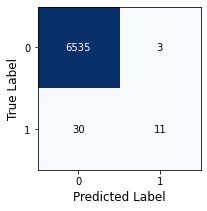

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import confusion_matrix
preds_svc_rbf=(np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= 50*0.01])).astype(bool)
conf_matrix = confusion_matrix(y_test, preds_svc_rbf)

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(3, 3), cmap=plt.cm.Blues) 
plt.xlabel('Predicted Label', fontsize=12) 
plt.ylabel('True Label', fontsize=12) 
plt.show()

In [ ]:
# Save the Model
filename = 'model_svc_rbf.sav'
pickle.dump(model_svc_rbf, open(filename, 'wb'))

In [10]:
model_svc_rbf=pickle.load(open('model_svc_rbf.sav', 'rb'))

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import plotly.graph_objects as go
import numpy as np
from math import sqrt


def plot_roc_curve(true_y, y_prob, positive=1):
    c_fill      = 'rgba(52, 152, 219, 0.2)'
    c_line      = 'rgba(52, 152, 219, 0.5)'
    c_line_main = 'rgba(200, 50, 50, 1.0)'
    c_grid      = 'rgba(189, 195, 199, 0.5)'
    c_annot     = 'rgba(149, 165, 166, 0.5)'
    c_i = 'rgba(255, 255, 255, 0)'
    c_highlight = 'rgba(192, 57, 43, 1.0)'
    AUC = roc_auc_score(true_y, y_prob)
    N1 = sum(true_y == positive)
    N2 = sum(true_y != positive)
    Q1 = AUC / (2 - AUC)
    Q2 = 2*AUC**2 / (1 + AUC)
    SE_AUC = sqrt((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1
    auc=roc_auc_score(true_y, y_prob)
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    fig = go.Figure([

    go.Scatter(
        x          = fpr,
        y          = tpr,
        line       = dict(color=c_line_main, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'AUC: {auc:.4f}'),
    go.Scatter(
        x          = fpr,
        y          = tpr,
        line       = dict(color=c_i, width=0),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'(95% CI '+f'{lower:.4f}-{upper:.4f})')
    ])
    fig.add_shape(
        type ='line', 
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
    fig.update_layout(
        template    = 'plotly_white', 
        title_x     = 0.5,
        xaxis_title = "<b>1 - Specificity</b>",
        yaxis_title = "<b>Recall</b>",
        width       = 600,
        height      = 600,
        legend      = dict(
            yanchor="bottom", 
            xanchor="right", 
            x=0.95,
            y=0.01,
        )
    )
    fig.update_yaxes(
        range       = [0, 1],
        gridcolor   = c_grid,
        scaleanchor = "x", 
        scaleratio  = 1,
        linecolor   = 'black')
    fig.update_xaxes(
        range       = [0, 1],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black')
    return fig



def plot_roc_curve2(true_y1, y_prob1, true_y2, y_prob2, name1, name2, positive=1):
    c_fill      = 'rgba(52, 152, 219, 0.2)'
    c_line      = 'rgba(52, 152, 219, 0.5)'
    c_line_main1 = 'rgba(250, 50, 50, 1.0)'
    c_line_main2 = 'rgba(50, 50, 250, 1.0)'
    c_grid      = 'rgba(5, 5, 5, 0.5)'
    c_annot     = 'rgba(149, 165, 166, 0.5)'
    c_i = 'rgba(255, 255, 255, 0)'
    c_highlight = 'rgba(192, 57, 43, 1.0)'
    AUC1 = roc_auc_score(true_y1, y_prob1)
    N1 = sum(true_y1 == positive)
    N2 = sum(true_y1 != positive)
    Q1 = AUC1 / (2 - AUC1)
    Q2 = 2*AUC1**2 / (1 + AUC1)
    SE_AUC1 = sqrt((AUC1*(1 - AUC1) + (N1 - 1)*(Q1 - AUC1**2) + (N2 - 1)*(Q2 - AUC1**2)) / (N1*N2))
    lower1 = AUC1 - 1.96*SE_AUC1
    upper1 = AUC1 + 1.96*SE_AUC1
    if lower1 < 0:
        lower1 = 0
    if upper1 > 1:
        upper1 = 1
    auc1=roc_auc_score(true_y1, y_prob1)
    fpr1, tpr1, thresholds1 = roc_curve(true_y1, y_prob1)
    
    
    AUC2 = roc_auc_score(true_y2, y_prob2)
    N1 = sum(true_y2 == positive)
    N2 = sum(true_y2 != positive)
    Q1 = AUC2 / (2 - AUC2)
    Q2 = 2*AUC2**2 / (1 + AUC2)
    SE_AUC2 = sqrt((AUC2*(1 - AUC2) + (N1 - 1)*(Q1 - AUC2**2) + (N2 - 1)*(Q2 - AUC2**2)) / (N1*N2))
    lower2 = AUC2 - 1.96*SE_AUC2
    upper2 = AUC2 + 1.96*SE_AUC2
    if lower2 < 0:
        lower2 = 0
    if upper2 > 1:
        upper2 = 1
    auc2=roc_auc_score(true_y2, y_prob2)
    fpr2, tpr2, thresholds2 = roc_curve(true_y2, y_prob2)
    
    fig = go.Figure([
    go.Scatter(
        x          = fpr1,
        y          = tpr1,
        line       = dict(color=c_line_main1, width=5),
        hoverinfo  = "skip",
        showlegend = True,
        name       = '<b>'+name1+'</b>'),
    go.Scatter(
        x          = fpr1,
        y          = tpr1,
        line       = dict(color=c_i, width=5),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'AUC: {auc1:.4f}'),
    go.Scatter(
        x          = fpr1,
        y          = tpr1,
        line       = dict(color=c_i, width=0),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'(95% CI: '+f'{lower1:.4f}-{upper1:.4f})'),
    go.Scatter(
        x          = fpr2,
        y          = tpr2,
        line       = dict(color=c_line_main2, width=5),
        hoverinfo  = "skip",
        showlegend = True,
        name       = '<b>'+name2+'</b>'),
    go.Scatter(
        x          = fpr2,
        y          = tpr2,
        line       = dict(color=c_i, width=5),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'AUC: {auc2:.4f}'),
    go.Scatter(
        x          = fpr2,
        y          = tpr2,
        line       = dict(color=c_i, width=0),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'(95% CI: '+f'{lower2:.4f}-{upper2:.4f})')
    ])
    fig.add_shape(
        type ='line', 
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
    fig.update_layout(
        template    = 'plotly_white', 
        title_x     = 1,
        xaxis_title = '<b>1-Specificity</b>',
        yaxis_title = "<b>Recall</b>",
        width       = 600,
        height      = 600,
        legend      = dict(
            yanchor="bottom", 
            xanchor="right", 
            x=0.95,
            y=0.01,
        )
    )
    fig.update_layout(
        font=dict(
            family="Times New Roman",
            size=22,  # Set the font size here
            color="Black"
        )
    )
    fig.update_yaxes(
        range       = [0, 1],
        gridcolor   = c_grid,
        scaleanchor = "x", 
        scaleratio  = 1,
        linecolor   = 'black')
    fig.update_xaxes(
        range       = [0, 1],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black')
    return fig



def plot_roc_curve3(true_y1, y_prob1, true_y2, y_prob2, true_y3, y_prob3, name1, name2, name3, positive=1):
    c_fill      = 'rgba(52, 152, 219, 0.2)'
    c_line      = 'rgba(52, 152, 219, 0.5)'
    c_line_main1 = 'rgba(250, 50, 50, 1.0)'
    c_line_main2 = 'rgba(50, 50, 250, 1.0)'
    c_line_main3 = 'rgba(50, 250, 50, 1.0)'
    c_grid      = 'rgba(5, 5, 5, 0.5)'
    c_annot     = 'rgba(149, 165, 166, 0.5)'
    c_i = 'rgba(255, 255, 255, 0)'
    c_highlight = 'rgba(192, 57, 43, 1.0)'
    AUC1 = roc_auc_score(true_y1, y_prob1)
    N1 = sum(true_y1 == positive)
    N2 = sum(true_y1 != positive)
    Q1 = AUC1 / (2 - AUC1)
    Q2 = 2*AUC1**2 / (1 + AUC1)
    SE_AUC1 = sqrt((AUC1*(1 - AUC1) + (N1 - 1)*(Q1 - AUC1**2) + (N2 - 1)*(Q2 - AUC1**2)) / (N1*N2))
    lower1 = AUC1 - 1.96*SE_AUC1
    upper1 = AUC1 + 1.96*SE_AUC1
    if lower1 < 0:
        lower1 = 0
    if upper1 > 1:
        upper1 = 1
    auc1=roc_auc_score(true_y1, y_prob1)
    fpr1, tpr1, thresholds1 = roc_curve(true_y1, y_prob1)
    
    
    AUC2 = roc_auc_score(true_y2, y_prob2)
    N1 = sum(true_y2 == positive)
    N2 = sum(true_y2 != positive)
    Q1 = AUC2 / (2 - AUC2)
    Q2 = 2*AUC2**2 / (1 + AUC2)
    SE_AUC2 = sqrt((AUC2*(1 - AUC2) + (N1 - 1)*(Q1 - AUC2**2) + (N2 - 1)*(Q2 - AUC2**2)) / (N1*N2))
    lower2 = AUC2 - 1.96*SE_AUC2
    upper2 = AUC2 + 1.96*SE_AUC2
    if lower2 < 0:
        lower2 = 0
    if upper2 > 1:
        upper2 = 1
    auc2=roc_auc_score(true_y2, y_prob2)
    fpr2, tpr2, thresholds2 = roc_curve(true_y2, y_prob2)
    
    AUC3 = roc_auc_score(true_y3, y_prob3)
    N1 = sum(true_y3 == positive)
    N2 = sum(true_y3 != positive)
    Q1 = AUC2 / (2 - AUC3)
    Q2 = 2*AUC3**2 / (1 + AUC3)
    SE_AUC3 = sqrt((AUC3*(1 - AUC3) + (N1 - 1)*(Q1 - AUC3**2) + (N2 - 1)*(Q2 - AUC3**2)) / (N1*N2))
    lower3 = AUC3 - 1.96*SE_AUC3
    upper3 = AUC3 + 1.96*SE_AUC3
    if lower3 < 0:
        lower3 = 0
    if upper3 > 1:
        upper3 = 1
    auc3=roc_auc_score(true_y3, y_prob3)
    fpr3, tpr3, thresholds3 = roc_curve(true_y3, y_prob3)
    fig = go.Figure([
    go.Scatter(
        x          = fpr1,
        y          = tpr1,
        line       = dict(color=c_line_main1, width=5),
        hoverinfo  = "skip",
        showlegend = True,
        name       = '<b>'+name1+'</b>'),
    go.Scatter(
        x          = fpr1,
        y          = tpr1,
        line       = dict(color=c_i, width=5),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'AUC: {auc1:.4f}'),
    go.Scatter(
        x          = fpr1,
        y          = tpr1,
        line       = dict(color=c_i, width=0),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'(95% CI: '+f'{lower1:.4f}-{upper1:.4f})'),
    go.Scatter(
        x          = fpr2,
        y          = tpr2,
        line       = dict(color=c_line_main2, width=5),
        hoverinfo  = "skip",
        showlegend = True,
        name       = '<b>'+name2+'</b>'),
    go.Scatter(
        x          = fpr2,
        y          = tpr2,
        line       = dict(color=c_i, width=5),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'AUC: {auc2:.4f}'),
    go.Scatter(
        x          = fpr2,
        y          = tpr2,
        line       = dict(color=c_i, width=0),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'(95% CI: '+f'{lower2:.4f}-{upper2:.4f})'),
    go.Scatter(
        x          = fpr3,
        y          = tpr3,
        line       = dict(color=c_line_main3, width=5),
        hoverinfo  = "skip",
        showlegend = True,
        name       = '<b>'+name3+'</b>'),
    go.Scatter(
        x          = fpr3,
        y          = tpr3,
        line       = dict(color=c_i, width=5),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'AUC: {auc3:.4f}'),
    go.Scatter(
        x          = fpr3,
        y          = tpr3,
        line       = dict(color=c_i, width=0),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'(95% CI: '+f'{lower3:.4f}-{upper3:.4f})'),
    ])
    fig.add_shape(
        type ='line', 
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
    fig.update_layout(
        template    = 'plotly_white', 
        title_x     = 1,
        xaxis_title = '<b>1-Specificity</b>',
        yaxis_title = "<b>Recall</b>",
        width       = 600,
        height      = 600,
        legend      = dict(
            yanchor="bottom", 
            xanchor="right", 
            x=0.95,
            y=0.01,
        )
    )
    fig.update_layout(
        font=dict(
            family="Times New Roman",
            size=22,  # Set the font size here
            color="Black"
        )
    )
    fig.update_yaxes(
        range       = [0, 1],
        gridcolor   = c_grid,
        scaleanchor = "x", 
        scaleratio  = 1,
        linecolor   = 'black')
    fig.update_xaxes(
        range       = [0, 1],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black')
    return fig

In [43]:
preds_rbf=model_svc_rbf.predict_proba(X_test)
plot_roc_curve(y_test, [item[1] for item in preds_rbf])


In [44]:
test=pd.concat([X_test, y_test], axis=1)
male1=test.drop(X_test[X_test['IRSEX_1 - Male'] == 0].index)
#male1=male1.sample(85, random_state=43)
male_predictors=male1.drop(['UDPYOPI_1 - Yes'], axis=1)
male_target=male1['UDPYOPI_1 - Yes']
female1=test.drop(X_test[X_test['IRSEX_1 - Male'] == 1].index)
#female1=female1.sample(85, random_state=43)
female_predictors=female1.drop(['UDPYOPI_1 - Yes'], axis=1)
female_target=female1['UDPYOPI_1 - Yes']
male_prob=model_svc_rbf.predict_proba(male_predictors)
female_prob=model_svc_rbf.predict_proba(female_predictors)
plot_roc_curve2(male_target, [item[1] for item in male_prob], female_target, [item[1] for item in female_prob], 'Male', 'Female')

In [45]:
def range_with_floats(start, stop, step):
    while stop > start:
        yield start
        start += step

In [46]:
# Males vs. females

df=pd.DataFrame([])

for i in range_with_floats(0.0, 100.0, 0.1):
        y_pred_male = (np.array([item[1] for item in model_svc_rbf.predict_proba(male_predictors) >= i*0.01])).astype(bool)
        cm_g1 = confusion_matrix(male_target, y_pred_male)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])

        y_pred_female = (np.array([item[1] for item in model_svc_rbf.predict_proba(female_predictors) >= i*0.01])).astype(bool)
        cm_g2 = confusion_matrix(female_target, y_pred_female)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])

        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)
        
        df = df.append(pd.DataFrame({'difference':difference, 'threshold':i}, index=[0]), ignore_index=True)

diff=np.array(df['difference'])

stats.ttest_1samp(diff, popmean=0)

Ttest_1sampResult(statistic=26.522808534714386, pvalue=8.460067610572958e-118)

In [47]:
# Males vs. females

df=pd.DataFrame([])

for i in range_with_floats(0.0, 100.0, 0.1):
    y_pred = (np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= i*0.01])).astype(bool)
    cm = confusion_matrix(y_test, y_pred)
    acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]) 
    sen=cm[1,1]/(cm[1,0]+cm[1,1]) 
    if sen>=0.7 and  acc>=0.5:
        y_pred_male = (np.array([item[1] for item in model_svc_rbf.predict_proba(male_predictors) >= i*0.01])).astype(bool)
        cm_g1 = confusion_matrix(male_target, y_pred_male)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
        accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1]) 
        
        y_pred_female = (np.array([item[1] for item in model_svc_rbf.predict_proba(female_predictors) >= i*0.01])).astype(bool)
        cm_g2 = confusion_matrix(female_target, y_pred_female)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
        accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1]) 

        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)
        
        df = df.append(pd.DataFrame({'accuracy':acc, 'sensitivity':sen, 'accuracy_g1':accuracy_g1, 'accuracy_g2':accuracy_g2, 'specificity_g1':specificity_g1, 'specificity_g2':specificity_g2,'sensitivity_g1':sensitivity_g1,'sensitivity_g2':sensitivity_g2, 'difference':difference, 'threshold':i}, index=[0]), ignore_index=True)

min_diff = df.iloc[df['difference'].idxmin()]
print('accuracy:', min_diff[0], 'sensitivity:', min_diff[1], 'accuracy_g1:', min_diff[2], 'accuracy_g2:', min_diff[3], 'specificity_g1:', min_diff[4], 'specificity_g2:', min_diff[5], 'sensitivity_g1:', min_diff[6], 'sensitivity_g2:', min_diff[7], 'difference:', min_diff[8], 'threshold:', min_diff[9])  

y_pred = (np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= 50*0.01])).astype(bool)
cm = confusion_matrix(y_test, y_pred)
acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]) 
sen=cm[1,1]/(cm[1,0]+cm[1,1]) 

y_pred_male = (np.array([item[1] for item in model_svc_rbf.predict_proba(male_predictors) >= 50*0.01])).astype(bool)
cm_g1 = confusion_matrix(male_target, y_pred_male)
specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1]) 
y_pred_female = (np.array([item[1] for item in model_svc_rbf.predict_proba(female_predictors) >= 50*0.01])).astype(bool)
cm_g2 = confusion_matrix(female_target, y_pred_female)
specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1]) 
difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

print('accuracy:', acc, 'sensitivity:', sen, 'accuracy_g1:', accuracy_g1, 'accuracy_g2:', accuracy_g2, 'specificity_g1:', specificity_g1, 'specificity_g2:', specificity_g2, 'sensitivity_g1:', sensitivity_g1, 'sensitivity_g2:', sensitivity_g2, 'difference:', difference, 'threshold:', 50.0)  

accuracy: 0.7142422860617115 sensitivity: 1.0 accuracy_g1: 0.7342447482494164 accuracy_g2: 0.6974860335195531 specificity_g1: 0.732998324958124 specificity_g2: 0.6951871657754011 sensitivity_g1: 1.0 sensitivity_g2: 1.0 difference: 0.03781115918272293 threshold: 0.2
accuracy: 0.9949840401276789 sensitivity: 0.2682926829268293 accuracy_g1: 0.9956652217405801 accuracy_g2: 0.994413407821229 specificity_g1: 0.9993299832495812 specificity_g2: 0.9997185477061638 sensitivity_g1: 0.21428571428571427 sensitivity_g2: 0.2962962962962963 difference: 0.08239914646716454 threshold: 50.0


In [19]:
notmarried=test.drop(X_test[X_test['IRMARIT_4 - Never Been Married'] == 0].index)
#notmarried=notmarried.sample(85, random_state=43)
notmarried_predictors=notmarried.drop(['UDPYOPI_1 - Yes'], axis=1)
notmarried_target=notmarried['UDPYOPI_1 - Yes']
elsee=test.drop(X_test[X_test['IRMARIT_4 - Never Been Married'] == 1].index)
#elsee=elsee.sample(85, random_state=43)
elsee_predictors=elsee.drop(['UDPYOPI_1 - Yes'], axis=1)
elsee_target=elsee['UDPYOPI_1 - Yes']
notmarried_prob=model_svc_rbf.predict_proba(notmarried_predictors)
elsee_prob=model_svc_rbf.predict_proba(elsee_predictors)
plot_roc_curve2(notmarried_target, [item[1] for item in notmarried_prob], elsee_target, [item[1] for item in elsee_prob],'Never been married', 'Others')

In [20]:
# Males vs. females

df=pd.DataFrame([])

for i in range_with_floats(0.0, 100.0, 0.1):
        y_pred_notmarried = (np.array([item[1] for item in model_svc_rbf.predict_proba(notmarried_predictors) >= i*0.01])).astype(bool)
        cm_g1 = confusion_matrix(notmarried_target, y_pred_notmarried)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])

        y_pred_elsee = (np.array([item[1] for item in model_svc_rbf.predict_proba(elsee_predictors) >= i*0.01])).astype(bool)
        cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])

        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)
        
        df = df.append(pd.DataFrame({'difference':difference, 'threshold':i}, index=[0]), ignore_index=True)

diff=np.array(df['difference'])

stats.ttest_1samp(diff, popmean=0)

Ttest_1sampResult(statistic=35.58908940089814, pvalue=6.950533127506679e-180)

In [21]:
# Males vs. females

df=pd.DataFrame([])

for i in range_with_floats(0.0, 100.0, 0.1):
    y_pred = (np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= i*0.01])).astype(bool)
    cm = confusion_matrix(y_test, y_pred)
    acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]) 
    sen=cm[1,1]/(cm[1,0]+cm[1,1]) 
    if sen>=0.7 and  acc>=0.5:
        y_pred_notmarried = (np.array([item[1] for item in model_svc_rbf.predict_proba(notmarried_predictors) >= i*0.01])).astype(bool)
        cm_g1 = confusion_matrix(notmarried_target, y_pred_notmarried)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
        accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1]) 
        
        y_pred_elsee = (np.array([item[1] for item in model_svc_rbf.predict_proba(elsee_predictors) >= i*0.01])).astype(bool)
        cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
        accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1]) 

        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)
        
        df = df.append(pd.DataFrame({'accuracy':acc, 'sensitivity':sen, 'accuracy_g1':accuracy_g1, 'accuracy_g2':accuracy_g2, 'specificity_g1':specificity_g1, 'specificity_g2':specificity_g2,'sensitivity_g1':sensitivity_g1,'sensitivity_g2':sensitivity_g2, 'difference':difference, 'threshold':i}, index=[0]), ignore_index=True)

min_diff = df.iloc[df['difference'].idxmin()]
print('accuracy:', min_diff[0], 'sensitivity:', min_diff[1], 'accuracy_g1:', min_diff[2], 'accuracy_g2:', min_diff[3], 'specificity_g1:', min_diff[4], 'specificity_g2:', min_diff[5], 'sensitivity_g1:', min_diff[6], 'sensitivity_g2:', min_diff[7], 'difference:', min_diff[8], 'threshold:', min_diff[9])  

y_pred = (np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= 50*0.01])).astype(bool)
cm = confusion_matrix(y_test, y_pred)
acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]) 
sen=cm[1,1]/(cm[1,0]+cm[1,1]) 

y_pred_notmarried = (np.array([item[1] for item in model_svc_rbf.predict_proba(notmarried_predictors) >= 50*0.01])).astype(bool)
cm_g1 = confusion_matrix(notmarried_target, y_pred_notmarried)
specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1]) 
y_pred_elsee = (np.array([item[1] for item in model_svc_rbf.predict_proba(elsee_predictors) >= 50*0.01])).astype(bool)
cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1]) 
difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

print('accuracy:', acc, 'sensitivity:', sen, 'accuracy_g1:', accuracy_g1, 'accuracy_g2:', accuracy_g2, 'specificity_g1:', specificity_g1, 'specificity_g2:', specificity_g2, 'sensitivity_g1:', sensitivity_g1, 'sensitivity_g2:', sensitivity_g2, 'difference:', difference, 'threshold:', 50.0)  

accuracy: 0.8215534275725794 sensitivity: 1.0 accuracy_g1: 0.8214916931778014 accuracy_g2: 0.8216 specificity_g1: 0.8204125177809388 specificity_g2: 0.820450885668277 sensitivity_g1: 1.0 sensitivity_g2: 1.0 difference: 3.836788733813101e-05 threshold: 0.30000000000000004
accuracy: 0.9949840401276789 sensitivity: 0.2682926829268293 accuracy_g1: 0.9946977730646872 accuracy_g2: 0.9952 specificity_g1: 0.9992887624466572 specificity_g2: 0.9997316156736447 sensitivity_g1: 0.23529411764705882 sensitivity_g2: 0.2916666666666667 difference: 0.056815402246595315 threshold: 50.0


In [22]:
work=test.drop(X_test[X_test['WRK35WKUS_1 - Yes'] == 0].index)
#pop=pop.sample(95, random_state=25)
work_predictors=work.drop(['UDPYOPI_1 - Yes'], axis=1)
work_target=work['UDPYOPI_1 - Yes']
elsee=test.drop(X_test[X_test['WRK35WKUS_1 - Yes'] == 1].index)
#elsee=elsee.sample(95, random_state=25)
elsee_predictors=elsee.drop(['UDPYOPI_1 - Yes'], axis=1)
elsee_target=elsee['UDPYOPI_1 - Yes']
work_prob=model_svc_rbf.predict_proba(work_predictors)
elsee_prob=model_svc_rbf.predict_proba(elsee_predictors)
plot_roc_curve2(work_target, [item[1] for item in work_prob],elsee_target, [item[1] for item in elsee_prob], 'Working 35 hours or more', 'Others')

In [23]:
# Work

df=pd.DataFrame([])

for i in range_with_floats(0.0, 100.0, 0.1):
        y_pred_work = (np.array([item[1] for item in model_svc_rbf.predict_proba(work_predictors) >= i*0.01])).astype(bool)
        cm_g1 = confusion_matrix(work_target, y_pred_work)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])

        y_pred_elsee = (np.array([item[1] for item in model_svc_rbf.predict_proba(elsee_predictors) >= i*0.01])).astype(bool)
        cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])

        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)
        
        df = df.append(pd.DataFrame({'difference':difference, 'threshold':i}, index=[0]), ignore_index=True)

diff=np.array(df['difference'])

stats.ttest_1samp(diff, popmean=0)

Ttest_1sampResult(statistic=37.210877664808315, pvalue=6.416402941471456e-191)

In [24]:
# Work

df=pd.DataFrame([])

for i in range_with_floats(0.0, 100.0, 0.1):
    y_pred = (np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= i*0.01])).astype(bool)
    cm = confusion_matrix(y_test, y_pred)
    acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]) 
    sen=cm[1,1]/(cm[1,0]+cm[1,1]) 
    if sen>=0.7 and  acc>=0.5:
        y_pred_work = (np.array([item[1] for item in model_svc_rbf.predict_proba(work_predictors) >= i*0.01])).astype(bool)
        cm_g1 = confusion_matrix(work_target, y_pred_work)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
        accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1]) 
        
        y_pred_elsee = (np.array([item[1] for item in model_svc_rbf.predict_proba(elsee_predictors) >= i*0.01])).astype(bool)
        cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
        accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1]) 

        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)
        
        df = df.append(pd.DataFrame({'accuracy':acc, 'sensitivity':sen, 'accuracy_g1':accuracy_g1, 'accuracy_g2':accuracy_g2, 'specificity_g1':specificity_g1, 'specificity_g2':specificity_g2,'sensitivity_g1':sensitivity_g1,'sensitivity_g2':sensitivity_g2, 'difference':difference, 'threshold':i}, index=[0]), ignore_index=True)

min_diff = df.iloc[df['difference'].idxmin()]
print('accuracy:', min_diff[0], 'sensitivity:', min_diff[1], 'accuracy_g1:', min_diff[2], 'accuracy_g2:', min_diff[3], 'specificity_g1:', min_diff[4], 'specificity_g2:', min_diff[5], 'sensitivity_g1:', min_diff[6], 'sensitivity_g2:', min_diff[7], 'difference:', min_diff[8], 'threshold:', min_diff[9])  

y_pred = (np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= 50*0.01])).astype(bool)
cm = confusion_matrix(y_test, y_pred)
acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]) 
sen=cm[1,1]/(cm[1,0]+cm[1,1]) 

y_pred_work = (np.array([item[1] for item in model_svc_rbf.predict_proba(work_predictors) >= 50*0.01])).astype(bool)
cm_g1 = confusion_matrix(work_target, y_pred_work)
specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1]) 
y_pred_elsee = (np.array([item[1] for item in model_svc_rbf.predict_proba(elsee_predictors) >= 50*0.01])).astype(bool)
cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1]) 
difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

print('accuracy:', acc, 'sensitivity:', sen, 'accuracy_g1:', accuracy_g1, 'accuracy_g2:', accuracy_g2, 'specificity_g1:', specificity_g1, 'specificity_g2:', specificity_g2, 'sensitivity_g1:', sensitivity_g1, 'sensitivity_g2:', sensitivity_g2, 'difference:', difference, 'threshold:', 50.0)  

accuracy: 0.9332725338197294 sensitivity: 0.8780487804878049 accuracy_g1: 0.9362985299660761 accuracy_g2: 0.9312277126846663 specificity_g1: 0.9364599092284418 specificity_g2: 0.9316897791474062 sensitivity_g1: 0.8888888888888888 sensitivity_g2: 0.875 difference: 0.01865901896992439 threshold: 1.0999999999999999
accuracy: 0.9949840401276789 sensitivity: 0.2682926829268293 accuracy_g1: 0.9969845457972107 accuracy_g2: 0.9936321956189506 specificity_g1: 0.9996217851739788 specificity_g2: 0.9994863893168978 sensitivity_g1: 0.2222222222222222 sensitivity_g2: 0.28125 difference: 0.05916317363485879 threshold: 50.0


In [25]:
white=test.drop(X_test[X_test['NEWRACE2_White'] == 0].index)
#elsee=elsee.sample(95, random_state=25)
white_predictors=white.drop(['UDPYOPI_1 - Yes'], axis=1)
white_target=white['UDPYOPI_1 - Yes']
black=test.drop(X_test[X_test['NEWRACE2_Black'] == 0].index)

#pop=pop.sample(95, random_state=25)
black_predictors=black.drop(['UDPYOPI_1 - Yes'], axis=1)
black_target=black['UDPYOPI_1 - Yes']
white_prob=model_svc_rbf.predict_proba(white_predictors)
black_prob=model_svc_rbf.predict_proba(black_predictors)
plot_roc_curve2(white_target, [item[1] for item in white_prob], black_target, [item[1] for item in black_prob], 'White', 'Black')

In [26]:
# White vs. Black
df=pd.DataFrame([])
for i in range_with_floats(0.0, 100.0, 0.1):
        y_pred_white = (np.array([item[1] for item in model_svc_rbf.predict_proba(white_predictors) >= i*0.01])).astype(bool)
        cm_g1 = confusion_matrix(white_target, y_pred_white)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])

        y_pred_black = (np.array([item[1] for item in model_svc_rbf.predict_proba(black_predictors) >= i*0.01])).astype(bool)
        cm_g2 = confusion_matrix(black_target, y_pred_black)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])

        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)
        
        df = df.append(pd.DataFrame({'difference':difference, 'threshold':i}, index=[0]), ignore_index=True)
diff=np.array(df['difference'])

stats.ttest_1samp(diff, popmean=0)

Ttest_1sampResult(statistic=54.92043015305512, pvalue=3.575180871449451e-304)

In [27]:
# White vs. black

df=pd.DataFrame([])


for i in range_with_floats(0.0, 100.0, 0.1):
    y_pred = (np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= i*0.01])).astype(bool)
    cm = confusion_matrix(y_test, y_pred)
    acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]) 
    sen=cm[1,1]/(cm[1,0]+cm[1,1]) 
    if sen>=0.7 and  acc>=0.5:
        y_pred_white = (np.array([item[1] for item in model_svc_rbf.predict_proba(white_predictors) >= i*0.01])).astype(bool)
        cm_g1 = confusion_matrix(white_target, y_pred_white)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
        accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1])
        y_pred_black = (np.array([item[1] for item in model_svc_rbf.predict_proba(black_predictors) >= i*0.01])).astype(bool)
        cm_g2 = confusion_matrix(black_target, y_pred_black)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
        accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1])
        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)
        
        df = df.append(pd.DataFrame({'accuracy':acc, 'sensitivity':sen, 'accuracy_g1':accuracy_g1, 'accuracy_g2':accuracy_g2, 'specificity_g1':specificity_g1, 'specificity_g2':specificity_g2,'sensitivity_g1':sensitivity_g1,'sensitivity_g2':sensitivity_g2, 'difference':difference, 'threshold':i}, index=[0]), ignore_index=True)

min_diff = df.iloc[df['difference'].idxmin()]
print('accuracy:', min_diff[0], 'sensitivity:', min_diff[1], 'accuracy_g1:', min_diff[2], 'accuracy_g2:', min_diff[3], 'specificity_g1:', min_diff[4], 'specificity_g2:', min_diff[5], 'sensitivity_g1:', min_diff[6], 'sensitivity_g2:', min_diff[7], 'difference:', min_diff[8], 'threshold:', min_diff[9])  

y_pred = (np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= 50*0.01])).astype(bool)
cm = confusion_matrix(y_test, y_pred)
acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]) 
sen=cm[1,1]/(cm[1,0]+cm[1,1]) 

y_pred_white = (np.array([item[1] for item in model_svc_rbf.predict_proba(white_predictors) >= 50*0.01])).astype(bool)
cm_g1 = confusion_matrix(white_target, y_pred_white)
specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1]) 

y_pred_black = (np.array([item[1] for item in model_svc_rbf.predict_proba(black_predictors) >= 50*0.01])).astype(bool)
cm_g2 = confusion_matrix(black_target, y_pred_black)
specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1]) 
difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

print('accuracy:', acc, 'sensitivity:', sen, 'accuracy_g1:', accuracy_g1, 'accuracy_g2:', accuracy_g2, 'specificity_g1:', specificity_g1, 'specificity_g2:', specificity_g2, 'sensitivity_g1:', sensitivity_g1, 'sensitivity_g2:', sensitivity_g2, 'difference:', difference, 'threshold:', 50.0)  

accuracy: 0.86031311749506 sensitivity: 0.975609756097561 accuracy_g1: 0.8514205868653936 accuracy_g2: 0.8493788819875776 specificity_g1: 0.8504103165298945 specificity_g2: 0.8486739469578783 sensitivity_g1: 1.0 sensitivity_g2: 1.0 difference: 0.001736369572016172 threshold: 0.4
accuracy: 0.9949840401276789 sensitivity: 0.2682926829268293 accuracy_g1: 0.9951094550535631 accuracy_g2: 0.9937888198757764 specificity_g1: 0.9995310668229778 specificity_g2: 0.9984399375975039 sensitivity_g1: 0.3448275862068966 sensitivity_g2: 0.0 difference: 0.3459187154323704 threshold: 50.0


In [28]:
income=test.drop(X_test[X_test['INCOME_1 - Less than $20,000'] == 0].index)
#elsee=elsee.sample(95, random_state=25)
income_predictors=income.drop(['UDPYOPI_1 - Yes'], axis=1)
income_target=income['UDPYOPI_1 - Yes']
elsee=test.drop(X_test[X_test['INCOME_1 - Less than $20,000'] == 1].index)
#pop=pop.sample(95, random_state=25)
elsee_predictors=elsee.drop(['UDPYOPI_1 - Yes'], axis=1)
elsee_target=elsee['UDPYOPI_1 - Yes']
income_prob=model_svc_rbf.predict_proba(income_predictors)
elsee_prob=model_svc_rbf.predict_proba(elsee_predictors)
plot_roc_curve2(income_target, [item[1] for item in income_prob], elsee_target, [item[1] for item in elsee_prob], 'Income less than $20,000', 'Other')

In [29]:
# income less than 20 vs. others
df=pd.DataFrame([])
for i in range_with_floats(0.0, 100.0, 0.1):
        y_pred_income = (np.array([item[1] for item in model_svc_rbf.predict_proba(income_predictors) >= i*0.01])).astype(bool)
        cm_g1 = confusion_matrix(income_target, y_pred_income)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])

        y_pred_elsee = (np.array([item[1] for item in model_svc_rbf.predict_proba(elsee_predictors) >= i*0.01])).astype(bool)
        cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])

        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)
        
        df = df.append(pd.DataFrame({'difference':difference, 'threshold':i}, index=[0]), ignore_index=True)
diff=np.array(df['difference'])

stats.ttest_1samp(diff, popmean=0)

Ttest_1sampResult(statistic=41.94192187302022, pvalue=1.2991208916180799e-222)

In [30]:
# income less than 20 vs. others

df=pd.DataFrame([])


for i in range_with_floats(0.0, 100.0, 0.1):
    y_pred = (np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= i*0.01])).astype(bool)
    cm = confusion_matrix(y_test, y_pred)
    acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]) 
    sen=cm[1,1]/(cm[1,0]+cm[1,1]) 
    if sen>=0.7 and  acc>=0.5:
        y_pred_income = (np.array([item[1] for item in model_svc_rbf.predict_proba(income_predictors) >= i*0.01])).astype(bool)
        cm_g1 = confusion_matrix(income_target, y_pred_income)
        specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
        sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
        accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1])
        y_pred_elsee = (np.array([item[1] for item in model_svc_rbf.predict_proba(elsee_predictors) >= i*0.01])).astype(bool)
        cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
        specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
        sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
        accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1])
        difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)
        
        df = df.append(pd.DataFrame({'accuracy':acc, 'sensitivity':sen, 'accuracy_g1':accuracy_g1, 'accuracy_g2':accuracy_g2, 'specificity_g1':specificity_g1, 'specificity_g2':specificity_g2,'sensitivity_g1':sensitivity_g1,'sensitivity_g2':sensitivity_g2, 'difference':difference, 'threshold':i}, index=[0]), ignore_index=True)

min_diff = df.iloc[df['difference'].idxmin()]
print('accuracy:', min_diff[0], 'sensitivity:', min_diff[1], 'accuracy_g1:', min_diff[2], 'accuracy_g2:', min_diff[3], 'specificity_g1:', min_diff[4], 'specificity_g2:', min_diff[5], 'sensitivity_g1:', min_diff[6], 'sensitivity_g2:', min_diff[7], 'difference:', min_diff[8], 'threshold:', min_diff[9])  

y_pred = (np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= 50*0.01])).astype(bool)
cm = confusion_matrix(y_test, y_pred)
acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]) 
sen=cm[1,1]/(cm[1,0]+cm[1,1]) 

y_pred_income = (np.array([item[1] for item in model_svc_rbf.predict_proba(income_predictors) >= 50*0.01])).astype(bool)
cm_g1 = confusion_matrix(income_target, y_pred_income)
specificity_g1 = cm_g1[0,0]/(cm_g1[0,0]+cm_g1[0,1])
sensitivity_g1 = cm_g1[1,1]/(cm_g1[1,0]+cm_g1[1,1])
accuracy_g1=(cm_g1[0,0]+cm_g1[1,1])/(cm_g1[0,0]+cm_g1[0,1]+cm_g1[1,0]+cm_g1[1,1]) 

y_pred_elsee = (np.array([item[1] for item in model_svc_rbf.predict_proba(elsee_predictors) >= 50*0.01])).astype(bool)
cm_g2 = confusion_matrix(elsee_target, y_pred_elsee)
specificity_g2 = cm_g2[0,0]/(cm_g2[0,0]+cm_g2[0,1])
sensitivity_g2 = cm_g2[1,1]/(cm_g2[1,0]+cm_g2[1,1])
accuracy_g2=(cm_g2[0,0]+cm_g2[1,1])/(cm_g2[0,0]+cm_g2[0,1]+cm_g2[1,0]+cm_g2[1,1]) 
difference=abs(specificity_g1-specificity_g2)+abs(sensitivity_g1-sensitivity_g2)

print('accuracy:', acc, 'sensitivity:', sen, 'accuracy_g1:', accuracy_g1, 'accuracy_g2:', accuracy_g2, 'specificity_g1:', specificity_g1, 'specificity_g2:', specificity_g2, 'sensitivity_g1:', sensitivity_g1, 'sensitivity_g2:', sensitivity_g2, 'difference:', difference, 'threshold:', 50.0)  

accuracy: 0.8215534275725794 sensitivity: 1.0 accuracy_g1: 0.7547169811320755 accuracy_g2: 0.833632447954056 specificity_g1: 0.7522567703109327 specificity_g2: 0.8327016783974012 sensitivity_g1: 1.0 sensitivity_g2: 1.0 difference: 0.08044490808646843 threshold: 0.30000000000000004
accuracy: 0.9949840401276789 sensitivity: 0.2682926829268293 accuracy_g1: 0.9910625620655412 accuracy_g2: 0.9956927494615937 specificity_g1: 0.9989969909729187 specificity_g2: 0.9996390543223245 sensitivity_g1: 0.2 sensitivity_g2: 0.2903225806451613 difference: 0.09096464399456705 threshold: 50.0


In [31]:

train=pd.concat([X_train, y_train], axis=1)
female1=train.drop(X_train[X_train['IRSEX_1 - Male'] == 1].index)
male1=train.drop(X_train[X_train['IRSEX_1 - Male'] == 0].index)
male1_test=test.drop(X_test[X_test['IRSEX_1 - Male'] == 0].index)
male1_test=male1_test.sample(2992, random_state=43)
male_predictors_test=male1_test.drop(['UDPYOPI_1 - Yes'], axis=1)
male_target_test=male1_test['UDPYOPI_1 - Yes']
female1_test=test.drop(X_test[X_test['IRSEX_1 - Male'] == 1].index)
female1_test=female1_test.sample(2992, random_state=43)
female_predictors_test=female1_test.drop(['UDPYOPI_1 - Yes'], axis=1)
female_target_test=female1_test['UDPYOPI_1 - Yes']
data_test=pd.concat([male1_test, female1_test])
X_for_test=data_test.drop(['UDPYOPI_1 - Yes'], axis=1)
y_for_test=data_test['UDPYOPI_1 - Yes']

In [32]:
c_grid = 'rgba(5, 5, 5, 0.5)'
male1_sample=male1.sample(12128, random_state=43)
female1_sample=female1.sample(12128, random_state=43)
male1_sample=male1_sample.sample(int(0.5*len(male1_sample)), random_state=43)
female1_sample=female1_sample.sample(int(0.5*len(female1_sample)), random_state=43)
data=pd.concat([male1_sample, female1_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']

class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
svc_rbf_50=SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_50=svc_rbf_50.fit(X_sample, y_sample)


male1_sample=male1.sample(12128, random_state=43)
female1_sample=female1.sample(12128, random_state=43)
male1_sample=male1_sample.sample(int(0.625*len(male1_sample)), random_state=43)
female1_sample=female1_sample.sample(int(0.375*len(female1_sample)), random_state=43)
data=pd.concat([male1_sample, female1_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']

class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
svc_rbf_625=SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_625=svc_rbf_625.fit(X_sample, y_sample)

male1_sample=male1.sample(12128, random_state=43)
female1_sample=female1.sample(12128, random_state=43)
male1_sample=male1_sample.sample(int(0.75*len(male1_sample)), random_state=43)
female1_sample=female1_sample.sample(int(0.25*len(female1_sample)), random_state=43)
data=pd.concat([male1_sample, female1_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']

class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
svc_rbf_75=SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_75=svc_rbf_75.fit(X_sample, y_sample)

male1_sample=male1.sample(12128, random_state=43)
female1_sample=female1.sample(12128, random_state=43)
male1_sample=male1_sample.sample(int(0.875*len(male1_sample)), random_state=43)
female1_sample=female1_sample.sample(int(0.125*len(female1_sample)), random_state=43)
data=pd.concat([male1_sample, female1_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
svc_rbf_875=SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_875=svc_rbf_875.fit(X_sample, y_sample)


prob1_50_svc=model_svc_rbf_50.predict_proba(male_predictors_test)
prob2_50_svc=model_svc_rbf_50.predict_proba(female_predictors_test)
prob1_625_svc=model_svc_rbf_625.predict_proba(male_predictors_test)
prob2_625_svc=model_svc_rbf_625.predict_proba(female_predictors_test)
prob1_75_svc=model_svc_rbf_75.predict_proba(male_predictors_test)
prob2_75_svc=model_svc_rbf_75.predict_proba(female_predictors_test)
prob1_875_svc=model_svc_rbf_875.predict_proba(male_predictors_test)
prob2_875_svc=model_svc_rbf_875.predict_proba(female_predictors_test)

# x axis values
x = [50, 62.5, 75, 87.5]
# corresponding y axis values
y = [roc_auc_score(female_target_test, [item[1] for item in prob2_50_svc]),roc_auc_score(female_target_test, [item[1] for item in prob2_625_svc]), 
     roc_auc_score(female_target_test, [item[1] for item in prob2_75_svc]),roc_auc_score(female_target_test, [item[1] for item in prob2_875_svc])]
z = [roc_auc_score(male_target_test, [item[1] for item in prob1_50_svc]),roc_auc_score(male_target_test, [item[1] for item in prob1_625_svc]), 
     roc_auc_score(male_target_test, [item[1] for item in prob1_75_svc]),roc_auc_score(male_target_test, [item[1] for item in prob1_875_svc])] 
c_line_main1 = 'rgba(200, 20, 20, 1.0)'
c_line_main2 = 'rgba(20, 20, 200, 1)'
fig = go.Figure([

    go.Scatter(
        x          = x,
        y          = y,
        line       = dict(color=c_line_main1, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = '<b>Female</b>'),
    go.Scatter(
        x          = x,
        y          = z,
        line       = dict(color=c_line_main2, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = '<b>Male</b>')
    ])
fig.add_shape(
        type ='line', 
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
fig.update_layout(
        template    = 'plotly_white', 
        title_x     = 0.5,
        xaxis_title = "<b>Percentage of males</b>",
        yaxis_title = "<b>AUC</b>",
        width       = 500,
        height      = 500,
        legend      = dict(
            yanchor="bottom", 
            xanchor="right", 
            x=0.95,
            y=0.01,
        )
    )
fig.update_layout(
        font=dict(
        family="Times New Roman",
        size=18,  # Set the font size here
        color="Black"
        )
    )
fig.update_yaxes(
        range       = [min(min(y), min(z))-0.1, max(max(y), max(z))+0.1],
        gridcolor   = c_grid,
        scaleanchor = "x", 
        scaleratio  = 170,
        linecolor   = 'black')
fig.update_xaxes(
        range       = [40, 100],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black',dtick=12.5)



In [33]:
notmarried=train.drop(X_train[X_train['IRMARIT_4 - Never Been Married'] == 0].index)
elsee=train.drop(X_train[X_train['IRMARIT_4 - Never Been Married'] == 1].index)
notmarried_test=test.drop(X_test[X_test['IRMARIT_4 - Never Been Married'] == 0].index)
notmarried_test=notmarried_test.sample(2824, random_state=43)
notmarried_predictors_test=notmarried_test.drop(['UDPYOPI_1 - Yes'], axis=1)
notmarried_target_test=notmarried_test['UDPYOPI_1 - Yes']
elsee_test=test.drop(X_test[X_test['IRMARIT_4 - Never Been Married'] == 1].index)
elsee_test=elsee_test.sample(2824, random_state=43)
elsee_predictors_test=elsee_test.drop(['UDPYOPI_1 - Yes'], axis=1)
elsee_target_test=elsee_test['UDPYOPI_1 - Yes']
data_test=pd.concat([notmarried_test, elsee_test])
X_for_test=data_test.drop(['UDPYOPI_1 - Yes'], axis=1)
y_for_test=data_test['UDPYOPI_1 - Yes']

In [34]:
notmarried_sample=notmarried.sample(11616, random_state=43)
elsee_sample=elsee.sample(11616, random_state=43)
notmarried_sample=notmarried_sample.sample(int(0.5*len(notmarried_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.5*len(elsee_sample)), random_state=43)
data=pd.concat([notmarried_sample, elsee_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']

class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
svc_rbf_50=SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_50=svc_rbf_50.fit(X_sample, y_sample)


notmarried_sample=notmarried.sample(11616, random_state=43)
elsee_sample=elsee.sample(11616, random_state=43)
notmarried_sample=notmarried_sample.sample(int(0.625*len(notmarried_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.375*len(elsee_sample)), random_state=43)
data=pd.concat([notmarried_sample, elsee_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']

class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
svc_rbf_625=SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_625=svc_rbf_625.fit(X_sample, y_sample)

notmarried_sample=notmarried.sample(11616, random_state=43)
elsee_sample=elsee.sample(11616, random_state=43)
notmarried_sample=notmarried_sample.sample(int(0.75*len(notmarried_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.25*len(elsee_sample)), random_state=43)
data=pd.concat([notmarried_sample, elsee_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']

class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
svc_rbf_75=SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_75=svc_rbf_75.fit(X_sample, y_sample)

notmarried_sample=notmarried.sample(11616, random_state=43)
elsee_sample=elsee.sample(11616, random_state=43)
notmarried_sample=notmarried_sample.sample(int(0.875*len(notmarried_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.125*len(elsee_sample)), random_state=43)
data=pd.concat([notmarried_sample, elsee_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
svc_rbf_875=SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_875=svc_rbf_875.fit(X_sample, y_sample)


prob1_50_svc=model_svc_rbf_50.predict_proba(notmarried_predictors_test)
prob2_50_svc=model_svc_rbf_50.predict_proba(elsee_predictors_test)
prob1_625_svc=model_svc_rbf_625.predict_proba(notmarried_predictors_test)
prob2_625_svc=model_svc_rbf_625.predict_proba(elsee_predictors_test)
prob1_75_svc=model_svc_rbf_75.predict_proba(notmarried_predictors_test)
prob2_75_svc=model_svc_rbf_75.predict_proba(elsee_predictors_test)
prob1_875_svc=model_svc_rbf_875.predict_proba(notmarried_predictors_test)
prob2_875_svc=model_svc_rbf_875.predict_proba(elsee_predictors_test)

# x axis values
x = [50, 62.5, 75, 87.5]
# corresponding y axis values
y = [roc_auc_score(elsee_target_test, [item[1] for item in prob2_50_svc]),roc_auc_score(elsee_target_test, [item[1] for item in prob2_625_svc]), 
     roc_auc_score(elsee_target_test, [item[1] for item in prob2_75_svc]),roc_auc_score(elsee_target_test, [item[1] for item in prob2_875_svc])]
z = [roc_auc_score(notmarried_target_test, [item[1] for item in prob1_50_svc]),roc_auc_score(notmarried_target_test, [item[1] for item in prob1_625_svc]), 
     roc_auc_score(notmarried_target_test, [item[1] for item in prob1_75_svc]),roc_auc_score(notmarried_target_test, [item[1] for item in prob1_875_svc])] 
c_line_main1 = 'rgba(200, 20, 20, 1.0)'
c_line_main2 = 'rgba(20, 20, 200, 1)'
fig = go.Figure([

    go.Scatter(
        x          = x,
        y          = y,
        line       = dict(color=c_line_main1, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>Others</b>'),
    go.Scatter(
        x          = x,
        y          = z,
        line       = dict(color=c_line_main2, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>Never been married</b>')
    ])
fig.add_shape(
        type ='line', 
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
fig.update_layout(
        template    = 'plotly_white', 
        title_x     = 0.5,
        xaxis_title = "<b>Percentage of 'Never been married'</b>",
        yaxis_title = "<b>AUC</b>",
        width       = 600,
        height      = 500,
        legend      = dict(
            yanchor="bottom", 
            xanchor="right", 
            x=0.95,
            y=0.01,
        )
    )
fig.update_layout(
        font=dict(
        family="Times New Roman",
        size=18,  # Set the font size here
        color="Black"
        )
    )
fig.update_layout(
        font=dict(
        family="Times New Roman",
        size=18,  # Set the font size here
        color="Black"
        )
    )
fig.update_yaxes(
        range       = [min(min(y), min(z))-0.1, max(max(y), max(z))+0.1],
        gridcolor   = c_grid,
        scaleanchor = "x", 
        scaleratio  = 170,
        linecolor   = 'black')
fig.update_xaxes(
        range       = [40, 100],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black',dtick=12.5)



In [35]:
work=train.drop(X_train[X_train['WRK35WKUS_1 - Yes'] == 0].index)
elsee=train.drop(X_train[X_train['WRK35WKUS_1 - Yes'] == 1].index)
work_test=test.drop(X_test[X_test['WRK35WKUS_1 - Yes'] == 0].index)
work_test=work_test.sample(2648, random_state=43)
work_predictors_test=work_test.drop(['UDPYOPI_1 - Yes'], axis=1)
work_target_test=work_test['UDPYOPI_1 - Yes']
elsee_test=test.drop(X_test[X_test['WRK35WKUS_1 - Yes'] == 1].index)
elsee_test=elsee_test.sample(2648, random_state=43)
elsee_predictors_test=elsee_test.drop(['UDPYOPI_1 - Yes'], axis=1)
elsee_target_test=elsee_test['UDPYOPI_1 - Yes']
data_test=pd.concat([work_test, elsee_test])
X_for_test=data_test.drop(['UDPYOPI_1 - Yes'], axis=1)
y_for_test=data_test['UDPYOPI_1 - Yes']

In [36]:
work_sample=work.sample(10752, random_state=43)
elsee_sample=elsee.sample(10752, random_state=43)
work_sample=work_sample.sample(int(0.5*len(work_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.5*len(elsee_sample)), random_state=43)
data=pd.concat([work_sample, elsee_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']

class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
svc_rbf_50=SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_50=svc_rbf_50.fit(X_sample, y_sample)


work_sample=work.sample(10752, random_state=43)
elsee_sample=elsee.sample(10752, random_state=43)
work_sample=work_sample.sample(int(0.625*len(work_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.375*len(elsee_sample)), random_state=43)
data=pd.concat([work_sample, elsee_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']

class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
svc_rbf_625=SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_625=svc_rbf_625.fit(X_sample, y_sample)

work_sample=work.sample(10752, random_state=43)
elsee_sample=elsee.sample(10752, random_state=43)
work_sample=work_sample.sample(int(0.75*len(work_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.25*len(elsee_sample)), random_state=43)
data=pd.concat([work_sample, elsee_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']

class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
svc_rbf_75=SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_75=svc_rbf_75.fit(X_sample, y_sample)

work_sample=work.sample(10752, random_state=43)
elsee_sample=elsee.sample(10752, random_state=43)
work_sample=work_sample.sample(int(0.875*len(work_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.125*len(elsee_sample)), random_state=43)
data=pd.concat([work_sample, elsee_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
svc_rbf_875=SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_875=svc_rbf_875.fit(X_sample, y_sample)


prob1_50_svc=model_svc_rbf_50.predict_proba(work_predictors_test)
prob2_50_svc=model_svc_rbf_50.predict_proba(elsee_predictors_test)
prob1_625_svc=model_svc_rbf_625.predict_proba(work_predictors_test)
prob2_625_svc=model_svc_rbf_625.predict_proba(elsee_predictors_test)
prob1_75_svc=model_svc_rbf_75.predict_proba(work_predictors_test)
prob2_75_svc=model_svc_rbf_75.predict_proba(elsee_predictors_test)
prob1_875_svc=model_svc_rbf_875.predict_proba(work_predictors_test)
prob2_875_svc=model_svc_rbf_875.predict_proba(elsee_predictors_test)

# x axis values
x = [50, 62.5, 75, 87.5]
# corresponding y axis values
y = [roc_auc_score(elsee_target_test, [item[1] for item in prob2_50_svc]),roc_auc_score(elsee_target_test, [item[1] for item in prob2_625_svc]), 
     roc_auc_score(elsee_target_test, [item[1] for item in prob2_75_svc]),roc_auc_score(elsee_target_test, [item[1] for item in prob2_875_svc])]
z = [roc_auc_score(work_target_test, [item[1] for item in prob1_50_svc]),roc_auc_score(work_target_test, [item[1] for item in prob1_625_svc]), 
     roc_auc_score(work_target_test, [item[1] for item in prob1_75_svc]),roc_auc_score(work_target_test, [item[1] for item in prob1_875_svc])] 
c_line_main1 = 'rgba(200, 20, 20, 1.0)'
c_line_main2 = 'rgba(20, 20, 200, 1)'
fig = go.Figure([

    go.Scatter(
        x          = x,
        y          = y,
        line       = dict(color=c_line_main1, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>Others</b>'),
    go.Scatter(
        x          = x,
        y          = z,
        line       = dict(color=c_line_main2, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>Working 35 hours or more</b>')
    ])
fig.add_shape(
        type ='line', 
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
fig.update_layout(
        template    = 'plotly_white', 
        title_x     = 0.3,
        xaxis_title = "<b>Percentage of 'Working 35 hours or more'</b>",
        yaxis_title = "<b>AUC</b>",
        width       = 600,
        height      = 500,
        legend      = dict(
            yanchor="bottom", 
            xanchor="right", 
            x=0.95,
            y=0.01,
        )
    )
fig.update_layout(
        font=dict(
        family="Times New Roman",
        size=18,  # Set the font size here
        color="Black"
        )
    )
fig.update_yaxes(
        range       = [min(min(y), min(z))-0.1, max(max(y), max(z))+0.1],
        gridcolor   = c_grid,
        scaleanchor = "x", 
        scaleratio  = 190,
        linecolor   = 'black')
fig.update_xaxes(
        range       = [40, 100],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black',dtick=12.5)



In [37]:
white=train.drop(X_train[X_train['NEWRACE2_White'] == 0].index)
black=train.drop(X_train[X_train['NEWRACE2_Black'] == 0].index)

white_test=test.drop(X_test[X_test['NEWRACE2_White'] == 0].index)
white_test=white_test.sample(640, random_state=43)
white_predictors_test=white_test.drop(['UDPYOPI_1 - Yes'], axis=1)
white_target_test=white_test['UDPYOPI_1 - Yes']

black_test=test.drop(X_test[X_test['NEWRACE2_Black'] == 0].index)
black_test=black_test.sample(640, random_state=43)
black_predictors_test=black_test.drop(['UDPYOPI_1 - Yes'], axis=1)
black_target_test=black_test['UDPYOPI_1 - Yes']
data_test=pd.concat([white_test, black_test])
X_for_test=data_test.drop(['UDPYOPI_1 - Yes'], axis=1)
y_for_test=data_test['UDPYOPI_1 - Yes']

In [38]:
white_sample=white.sample(2376, random_state=43)
black_sample=black.sample(2376, random_state=43)
white_sample=white_sample.sample(int(0.5*len(white_sample)), random_state=43)
black_sample=black_sample.sample(int(0.5*len(black_sample)), random_state=43)
data=pd.concat([white_sample, black_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
model_svc_rbf_50_work = SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_50=model_svc_rbf_50_work.fit(X_sample, y_sample)

white_sample=work.sample(2376, random_state=43)
black_sample=elsee.sample(2376, random_state=43)
white_sample=white_sample.sample(int(0.375*len(white_sample)), random_state=43)
black_sample=black_sample.sample(int(0.625*len(black_sample)), random_state=43)
data=pd.concat([white_sample, black_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
model_svc_rbf_625_work = SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_625=model_svc_rbf_625_work.fit(X_sample, y_sample)

white_sample=work.sample(2376, random_state=43)
black_sample=elsee.sample(2376, random_state=43)
white_sample=white_sample.sample(int(0.25*len(white_sample)), random_state=43)
black_sample=black_sample.sample(int(0.75*len(black_sample)), random_state=43)
data=pd.concat([white_sample, black_sample])
data=pd.concat([notmarried_sample, black_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
model_svc_rbf_75_work = SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_75=model_svc_rbf_75_work.fit(X_sample, y_sample)

white_sample=work.sample(2376, random_state=43)
black_sample=elsee.sample(2376, random_state=43)
white_sample=white_sample.sample(int(0.125*len(white_sample)), random_state=43)
black_sample=black_sample.sample(int(0.875*len(black_sample)), random_state=43)
data=pd.concat([white_sample, black_sample])
data=pd.concat([notmarried_sample, black_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
model_svc_rbf_875_work = SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
model_svc_rbf_875=model_svc_rbf_875_work.fit(X_sample, y_sample)


prob1_50_lr=model_svc_rbf_50.predict_proba(black_predictors_test)
prob2_50_lr=model_svc_rbf_50.predict_proba(white_predictors_test)
prob1_625_lr=model_svc_rbf_625.predict_proba(black_predictors_test)
prob2_625_lr=model_svc_rbf_625.predict_proba(white_predictors_test)
prob1_75_lr=model_svc_rbf_75.predict_proba(black_predictors_test)
prob2_75_lr=model_svc_rbf_75.predict_proba(white_predictors_test)
prob1_875_lr=model_svc_rbf_875.predict_proba(black_predictors_test)
prob2_875_lr=model_svc_rbf_875.predict_proba(white_predictors_test)

# x axis values
x = [50, 62.5, 75, 87.5]
# corresponding y axis values
y = [roc_auc_score(black_target_test, [item[1] for item in prob1_50_lr]),roc_auc_score(black_target_test, [item[1] for item in prob1_625_lr]), 
     roc_auc_score(black_target_test, [item[1] for item in prob1_75_lr]),roc_auc_score(black_target_test, [item[1] for item in prob1_875_lr])]
z = [roc_auc_score(white_target_test, [item[1] for item in prob2_50_lr]),roc_auc_score(white_target_test, [item[1] for item in prob2_625_lr]), 
     roc_auc_score(white_target_test, [item[1] for item in prob2_75_lr]),roc_auc_score(white_target_test, [item[1] for item in prob2_875_lr])] 
c_line_main1 = 'rgba(200, 20, 20, 1.0)'
c_line_main2 = 'rgba(20, 20, 200, 1)'
fig = go.Figure([

    go.Scatter(
        x          = x,
        y          = y,
        line       = dict(color=c_line_main1, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>Black</b>'),
    go.Scatter(
        x          = x,
        y          = z,
        line       = dict(color=c_line_main2, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>White</b>')
    ])
fig.add_shape(
        type ='line', 
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
fig.update_layout(
        template    = 'plotly_white', 
        title_x     = 0.3,
        xaxis_title = "<b>Percentage of black race</b>",
        yaxis_title = "<b>AUC</b>",
        width       = 600,
        height      = 500,
        legend      = dict(
            yanchor="bottom", 
            xanchor="right", 
            x=0.95,
            y=0.01,
        )
    )
fig.update_layout(
        font=dict(
        family="Times New Roman",
        size=18,  # Set the font size here
        color="Black"
        )
    )
fig.update_yaxes(
        range       = [min(min(y), min(z))-0.1, max(max(y), max(z))+0.1],
        gridcolor   = c_grid,
        scaleanchor = "x", 
        scaleratio  = 110,
        linecolor   = 'black')
fig.update_xaxes(
        range       = [40, 100],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black',dtick=12.5)


In [39]:
income=train.drop(X_train[X_train['INCOME_1 - Less than $20,000'] == 0].index)
elsee=train.drop(X_train[X_train['INCOME_1 - Less than $20,000'] == 1].index)
income_test=test.drop(X_test[X_test['INCOME_1 - Less than $20,000'] == 0].index)
income_test=income_test.sample(1000, random_state=43)
income_predictors_test=income_test.drop(['UDPYOPI_1 - Yes'], axis=1)
income_target_test=income_test['UDPYOPI_1 - Yes']
elsee_test=test.drop(X_test[X_test['INCOME_1 - Less than $20,000'] == 1].index)
elsee_test=elsee_test.sample(1000, random_state=43)
elsee_predictors_test=elsee_test.drop(['UDPYOPI_1 - Yes'], axis=1)
elsee_target_test=elsee_test['UDPYOPI_1 - Yes']
data_test=pd.concat([income_test, elsee_test])
X_for_test=data_test.drop(['UDPYOPI_1 - Yes'], axis=1)
y_for_test=data_test['UDPYOPI_1 - Yes']

In [40]:
income_sample=income.sample(3904, random_state=43)
elsee_sample=elsee.sample(3904, random_state=43)
income_sample=income_sample.sample(int(0.5*len(income_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.5*len(elsee_sample)), random_state=43)
data=pd.concat([income_sample, elsee_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
class_weights_sample=sklearn_weights
svc_rbf_50_work = SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
svc_rbf_50=svc_rbf_50_work.fit(X_sample, y_sample)

income_sample=work.sample(3904, random_state=43)
elsee_sample=elsee.sample(3904, random_state=43)
income_sample=income_sample.sample(int(0.625*len(income_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.375*len(elsee_sample)), random_state=43)
data=pd.concat([income_sample, elsee_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
svc_rbf_625_work = SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
svc_rbf_625=svc_rbf_625_work.fit(X_sample, y_sample)

income_sample=work.sample(3904, random_state=43)
elsee_sample=elsee.sample(3904, random_state=43)
income_sample=income_sample.sample(int(0.75*len(income_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.25*len(elsee_sample)), random_state=43)
data=pd.concat([income_sample, elsee_sample])
data=pd.concat([notmarried_sample, elsee_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
svc_rbf_75_work = SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
svc_rbf_75=svc_rbf_75_work.fit(X_sample, y_sample)

income_sample=work.sample(3904, random_state=43)
elsee_sample=elsee.sample(3904, random_state=43)
income_sample=income_sample.sample(int(0.875*len(income_sample)), random_state=43)
elsee_sample=elsee_sample.sample(int(0.125*len(elsee_sample)), random_state=43)
data=pd.concat([income_sample, elsee_sample])
data=pd.concat([notmarried_sample, elsee_sample])
X_sample=data.drop(['UDPYOPI_1 - Yes'], axis=1)
y_sample=data['UDPYOPI_1 - Yes']
class_weights_sample = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_sample),
                                        y = y_sample                                                   
                                    )
sklearn_weights = dict(enumerate(class_weights_sample))
svc_rbf_875_work = SVC(kernel='rbf', C=1, class_weight=sklearn_weights, max_iter=1e6, probability=True)
svc_rbf_875=svc_rbf_875_work.fit(X_sample, y_sample)


prob1_50_lr=svc_rbf_50.predict_proba(income_predictors_test)
prob2_50_lr=svc_rbf_50.predict_proba(elsee_predictors_test)
prob1_625_lr=svc_rbf_625.predict_proba(income_predictors_test)
prob2_625_lr=svc_rbf_625.predict_proba(elsee_predictors_test)
prob1_75_lr=svc_rbf_75.predict_proba(income_predictors_test)
prob2_75_lr=svc_rbf_75.predict_proba(elsee_predictors_test)
prob1_875_lr=svc_rbf_875.predict_proba(income_predictors_test)
prob2_875_lr=svc_rbf_875.predict_proba(elsee_predictors_test)

# x axis values
x = [50, 62.5, 75, 87.5]
# corresponding y axis values
y = [roc_auc_score(elsee_target_test, [item[1] for item in prob2_50_lr]),roc_auc_score(elsee_target_test, [item[1] for item in prob2_625_lr]), 
     roc_auc_score(elsee_target_test, [item[1] for item in prob2_75_lr]),roc_auc_score(elsee_target_test, [item[1] for item in prob2_875_lr])]
z = [roc_auc_score(income_target_test, [item[1] for item in prob1_50_lr]),roc_auc_score(income_target_test, [item[1] for item in prob1_625_lr]), 
     roc_auc_score(income_target_test, [item[1] for item in prob1_75_lr]),roc_auc_score(income_target_test, [item[1] for item in prob1_875_lr])] 
c_line_main1 = 'rgba(200, 20, 20, 1.0)'
c_line_main2 = 'rgba(20, 20, 200, 1)'
fig = go.Figure([

    go.Scatter(
        x          = x,
        y          = y,
        line       = dict(color=c_line_main1, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>Other</b>'),
    go.Scatter(
        x          = x,
        y          = z,
        line       = dict(color=c_line_main2, width=3),
        hoverinfo  = "skip",
        showlegend = True,
        name       = f'<b>Income less than $20,000</b>')
    ])
fig.add_shape(
        type ='line', 
        line =dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
fig.update_layout(
        template    = 'plotly_white', 
        title_x     = 0.3,
        xaxis_title = "<b>Percentage of 'Income less than $20,000'</b>",
        yaxis_title = "<b>AUC</b>",
        width       = 600,
        height      = 500,
        legend      = dict(
            yanchor="bottom", 
            xanchor="right", 
            x=0.95,
            y=0.01,
        )
    )
fig.update_layout(
        font=dict(
        family="Times New Roman",
        size=18,  # Set the font size here
        color="Black"
        )
    )
fig.update_yaxes(
        range       = [min(min(y), min(z))-0.1, max(max(y), max(z))+0.1],
        gridcolor   = c_grid,
        scaleanchor = "x", 
        scaleratio  = 190,
        linecolor   = 'black')
fig.update_xaxes(
        range       = [40, 100],
        gridcolor   = c_grid,
        constrain   = 'domain',
        linecolor   = 'black',dtick=12.5)


In [15]:
preds_gender = (np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= 0.2*0.01])).astype(int)
preds_marital = (np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= 0.3*0.01])).astype(int)
preds_work = (np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= 1.1*0.01])).astype(int)
preds_race = (np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= 0.4*0.01])).astype(int)
preds_income = (np.array([item[1] for item in model_svc_rbf.predict_proba(X_test) >= 0.3*0.01])).astype(int)
preds_1=[preds_gender, preds_marital, preds_work, preds_race, preds_income]
preds_1=np.array(preds_1)
w_gender=8.24/(8.24+5.68+5.92+34.59+9.09)
w_marital=5.68/(8.24+5.68+5.92+34.59+9.09)
w_work=5.92/(8.24+5.68+5.92+34.59+9.09)
w_race=34.59/(8.24+5.68+5.92+34.59+9.09)
w_income=9.09/(8.24+5.68+5.92+34.59+9.09)
wts=[w_gender, w_marital, w_work, w_race, w_income]
wted_preds1 = np.tensordot(preds_1, wts, axes=((0),(0)))
preds = (wted_preds1 >= 50*0.01).astype(bool)

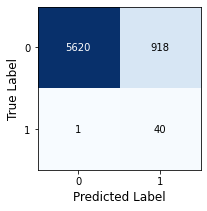

In [16]:
conf_matrix = confusion_matrix(y_test, preds)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(3, 3), cmap=plt.cm.Blues) 
plt.xlabel('Predicted Label', fontsize=12) 
plt.ylabel('True Label', fontsize=12) 
plt.show()